# K Nearest Neighbour

In [197]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [198]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b655afbbda574f0d82e63d84c00dcbe8 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='-iAcb_NXI-7RF189iE4qmyw8j-GE6Et5NpIXPe4Obg35',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_b655afbbda574f0d82e63d84c00dcbe8.get_object(Bucket='bestclassifier-donotdelete-pr-flqcpek74kqoqx',Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [199]:
len(data)

768

In [200]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [201]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [202]:
x = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [203]:
y = data[['Outcome']]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [204]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

In [205]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [206]:
from sklearn.neighbors import KNeighborsClassifier

In [207]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(x_train, y_train)
yhat = knn.predict(x_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


In [208]:
from sklearn.metrics import confusion_matrix
cnf_matrix1 = confusion_matrix(y_test, yhat)
cnf_matrix1

array([[92, 10],
       [24, 28]])

In [209]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [210]:
print("Jaccard Index : ", jaccard_similarity_score(y_test, yhat))
print("F1 Score : ", f1_score(y_test, yhat, average="weighted"))
print("Log loss :", log_loss(y_test, yhat))

Jaccard Index :  0.7792207792207793
F1 Score :  0.7691383030832573
Log loss : 7.625496061047177


In [211]:
a1=jaccard_similarity_score(y_test, yhat)
b1=f1_score(y_test, yhat, average="weighted")
c1=log_loss(y_test, yhat)

In [212]:
print("Accuracy of KNN Model")
print("Jaccard Index : ", a1*100,"%")
print("F1 Score  : ", b1*100,"%")
print("Log loss : ", c1)

Accuracy of KNN Model
Jaccard Index :  77.92207792207793 %
F1 Score  :  76.91383030832573 %
Log loss :  7.625496061047177


In [213]:
scalar = preprocessing.StandardScaler()
scalar.fit(data.drop('Outcome',axis=1))
scaled_features = scalar.transform(data.drop('Outcome',axis=1))
data_feat = pd.DataFrame(scaled_features, columns=data.columns[:-1])
data_feat.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [214]:
from sklearn.model_selection import cross_val_score

In [215]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, data_feat, data['Outcome'], cv=10)
    accuracy_rate.append(score.mean())

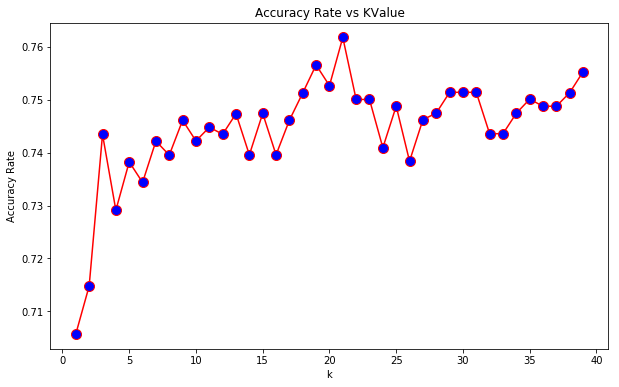

In [216]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), accuracy_rate, color='red', linestyle='solid', marker='o', markerfacecolor='blue', markersize=10)
plt.title("Accuracy Rate vs KValue")
plt.xlabel('k')
plt.ylabel('Accuracy Rate')
plt.show()

In [217]:
print("Accuracy of KNN Model")
print("Jaccard Index : ", a1*100,"%")
print("F1 Score  : ", b1*100,"%")
print("Log loss : ", c1)

Accuracy of KNN Model
Jaccard Index :  77.92207792207793 %
F1 Score  :  76.91383030832573 %
Log loss :  7.625496061047177


# Decision Tree

In [218]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [219]:

body = client_b655afbbda574f0d82e63d84c00dcbe8.get_object(Bucket='bestclassifier-donotdelete-pr-flqcpek74kqoqx',Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [220]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [221]:
x = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [222]:
y = data[['Outcome']]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [223]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [224]:
model = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3)
model.fit(x_train,y_train)
yhat = model.predict(x_test)

In [225]:
from sklearn.metrics import confusion_matrix
cnf_matrix2 = confusion_matrix(y_test, yhat)
cnf_matrix2

array([[86, 16],
       [13, 39]])

In [226]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [227]:
print("Jaccard Index : ", jaccard_similarity_score(y_test, yhat))
print("F1 Score : ", f1_score(y_test, yhat, average="weighted"))
print("Log loss :", log_loss(y_test, yhat))

Jaccard Index :  0.8116883116883117
F1 Score :  0.8129228840625131
Log loss : 6.504138370203201


In [228]:
a2=jaccard_similarity_score(y_test, yhat)
b2=f1_score(y_test, yhat, average="weighted")
c2=log_loss(y_test, yhat)

In [229]:
print("Accuracy of Decision Tree Model")
print("Jaccard Index : ", a2*100,"%")
print("F1 Score  : ", b2*100,"%")
print("Log loss : ", c2)

Accuracy of Decision Tree Model
Jaccard Index :  81.16883116883116 %
F1 Score  :  81.29228840625132 %
Log loss :  6.504138370203201


# Support Vector Machine

In [230]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [231]:
body = client_b655afbbda574f0d82e63d84c00dcbe8.get_object(Bucket='bestclassifier-donotdelete-pr-flqcpek74kqoqx',Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [232]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [233]:
len(data)

768

In [234]:
x = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
x[0:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [235]:
y = data[['Outcome']]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [236]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [237]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
yhat = clf.predict(x_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [238]:
from sklearn.metrics import confusion_matrix
cnf_matrix3 = confusion_matrix(y_test, yhat)
cnf_matrix3

array([[89, 11],
       [19, 35]])

In [239]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [240]:
print("Jaccard Index : ", jaccard_similarity_score(y_test, yhat))
print("F1 Score : ", f1_score(y_test, yhat, average="weighted"))
print("Log loss :", log_loss(y_test, yhat))

Jaccard Index :  0.8051948051948052
F1 Score :  0.8011488511488511
Log loss : 6.728390178045796


In [241]:
a3=jaccard_similarity_score(y_test, yhat)
b3=f1_score(y_test, yhat, average="weighted")
c3=log_loss(y_test, yhat)

In [242]:
print("Accuracy of SVM Model with Linear kernel")
print("Jaccard Index : ", a3*100,"%")
print("F1 Score  : ", b3*100,"%")
print("Log loss : ", c3)

Accuracy of SVM Model with Linear kernel
Jaccard Index :  80.51948051948052 %
F1 Score  :  80.11488511488511 %
Log loss :  6.728390178045796


# Logistic Regression

In [243]:
import numpy as np
import pandas as pd
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib as plt
%matplotlib inline

In [244]:
body = client_b655afbbda574f0d82e63d84c00dcbe8.get_object(Bucket='bestclassifier-donotdelete-pr-flqcpek74kqoqx',Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [245]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [246]:
len(data)

768

In [247]:
x = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [248]:
y = data[['Outcome']]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [249]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [250]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)
yhat = clf.predict(x_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [251]:
from sklearn.metrics import confusion_matrix
cnf_matrix4 = confusion_matrix(y_test, yhat)
cnf_matrix4

array([[91, 11],
       [19, 33]])

In [252]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [253]:
print("Jaccard Index : ", jaccard_similarity_score(y_test, yhat))
print("F1 Score : ", f1_score(y_test, yhat, average="weighted"))
print("Log loss :", log_loss(y_test, yhat))

Jaccard Index :  0.8051948051948052
F1 Score :  0.8007534917912277
Log loss : 6.728390178045798


In [254]:
a4=jaccard_similarity_score(y_test, yhat)
b4=f1_score(y_test, yhat, average="weighted")
c4=log_loss(y_test, yhat)

In [255]:
print("Accuracy of Logistic Regression Model")
print("Jaccard Index : ", a4*100,"%")
print("F1 Score  : ", b4*100,"%")
print("Log loss : ", c4)

Accuracy of Logistic Regression Model
Jaccard Index :  80.51948051948052 %
F1 Score  :  80.07534917912277 %
Log loss :  6.728390178045798


In [257]:
print("Outcomes of the Different Machine Learning Models :")
print("Confusion Matrix for KNN Model : \n", cnf_matrix1)
print("Confusion Matrix for Decision Tree Model : \n", cnf_matrix2)
print("Confusion Matrix for SVM Model : \n", cnf_matrix3)
print("Confusion Matrix for Logistic Regression Model : \n", cnf_matrix4)

Outcomes of the Different Machine Learning Models :
Confusion Matrix for KNN Model : 
 [[92 10]
 [24 28]]
Confusion Matrix for Decision Tree Model : 
 [[86 16]
 [13 39]]
Confusion Matrix for SVM Model : 
 [[89 11]
 [19 35]]
Confusion Matrix for Logistic Regression Model : 
 [[91 11]
 [19 33]]


In [288]:
print("Accuracy Scores Of Different Machine Learning Models :")
print("Scores \t\t\t        KNN \t\t  Decision Tree\t\t\t SVM \t\t LogisticRegression")
print("Jaccard Score\t\t" , a1*100 , "\t" , a2*100 , "\t" , a3*100 , "\t" , a4*100)
print("F1 Score     \t\t" , b1*100 , "\t" , b2*100 , "\t" , b3*100 , "\t" , b4*100)
print("Log Loss     \t\t" , c1     , "\t" , c2     , "\t" , c3     , "\t" , c4)

Accuracy Scores Of Different Machine Learning Models :
Scores 			        KNN 		  Decision Tree			 SVM 		 LogisticRegression
Jaccard Score		 77.92207792207793 	 81.16883116883116 	 80.51948051948052 	 80.51948051948052
F1 Score     		 76.91383030832573 	 81.29228840625132 	 80.11488511488511 	 80.07534917912277
Log Loss     		 7.625496061047177 	 6.504138370203201 	 6.728390178045796 	 6.728390178045798
